# 天河gmx测试

* 软件：gromacs5.0.6-cpu
* 软件目录：/vol6/software/gromacs5.0
* 对象：liganded gp120
* 文件目录:/vol6/home/shuqunliu/gerry/gp120

## 详细命令及输出
### generate the gromacs file
```
gmx_mpi pdb2gmx -f bound.pdb -o bound.gro -ff gromos53a6 -water spce -ignh -p topol.top

Before cleaning: 6712 pairs
Before cleaning: 7877 dihedrals
Making cmap torsions...
There are 2182 dihedrals, 2029 impropers, 5996 angles
          6712 pairs,     4096 bonds and     0 virtual sites
Total mass 44707.968 a.m.u.
Total charge -0.000 e
```
### define the box
```
gmx_mpi editconf -f bound.gro -o bound_newbox.gro -c -d 1.5 -bt dodecahedron

Read 4018 atoms
Volume: 407.985 nm^3, corresponds to roughly 183500 electrons
No velocities found
    system size :  6.165  6.225 10.854 (nm)
    diameter    : 11.177               (nm)
    center      :  3.173  4.373 12.521 (nm)
    box vectors :  6.055  6.210 10.849 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 407.98               (nm^3)
    shift       :  7.460  6.260 -7.509 (nm)
new center      : 10.633 10.633  5.012 (nm)
new box vectors : 14.177 14.177 14.177 (nm)
new box angles  :  60.00  60.00  90.00 (degrees)
new box volume  :2014.86               (nm^3)
```

### add solvate
```
gmx_mpi solvate -cp bound_newbox.gro -cs spc216.gro -o bound_solv.gro -p topol.top

Output configuration contains 199273 atoms in 65486 residues
Volume                 :     2014.86 (nm^3)
Density                :     1003.89 (g/l)
Number of SOL molecules:  65085
```
### yhi 
* 提交作业前 请查看可用（idle）节点数
* n 核数 N 节点数 一般只用指定核数 n:N = 12:1

```
yhi
---
TH_NET1      up 2-00:00:00     22   idle cn[2456,3001,3242,3519,3532,3539,3572,3574-3575,3581,4002,4028,4064,4092,4103,4140,4157,4352,4364,4412,5599,5623]
```
### energy minimization of the structure in solvate
```

Setting the LD random seed to 1818397286
Generated 165 of the 1596 non-bonded parameter combinations
Excluding 3 bonded neighbours molecule type 'Protein'
Excluding 2 bonded neighbours molecule type 'SOL'
Removing all charge groups because cutoff-scheme=Verlet
Analysing residue names:
There are:   401    Protein residues
There are: 65085      Water residues
Analysing Protein...
Number of degrees of freedom in T-Coupling group rest is 402561.00
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 120x120x120, spacing 0.118 0.118 0.118
Estimate for the relative computational load of the PME mesh part: 0.22
This run will generate roughly 15 Mb of data
```
******
```
yhrun -n 24 -p TH_NET1 gmx_mpi mdrun -v -deffnm em

Steepest Descents converged to Fmax < 1000 in 913 steps
Potential Energy  = -3.5350252e+06
Maximum force     =  9.5109045e+02 on atom 3780
Norm of force     =  1.7909399e+01
```
### nvt
```
gmx_mpi grompp -f nvt.mdp -c em.gro -p topol.top -o nvt.tpr

Setting the LD random seed to 1138260440
Generated 165 of the 1596 non-bonded parameter combinations
Excluding 3 bonded neighbours molecule type 'Protein'
turning all bonds into constraints...
Excluding 2 bonded neighbours molecule type 'SOL'
turning all bonds into constraints...
Setting gen_seed to 1244599708
Velocities were taken from a Maxwell distribution at 300 K
Removing all charge groups because cutoff-scheme=Verlet
Analysing residue names:
There are:   401    Protein residues
There are: 65085      Water residues
```
******
```
yhrun -n 20 -p TH_NET1 gmx_mpi mdrun -v -deffnm nvt

starting mdrun 'Protein in water'
50000 steps,    100.0 ps.
 Average load imbalance: 0.7 %
 Part of the total run time spent waiting due to load imbalance: 0.6 %
 Steps where the load balancing was limited by -rdd, -rcon and/or -dds: X 0 % Y 0 %
 Average PME mesh/force load: 0.724
 Part of the total run time spent waiting due to PP/PME imbalance: 4.5 %


               Core t (s)   Wall t (s)        (%)
       Time:    31838.559     1597.270     1993.3
                 (ns/day)    (hour/ns)
Performance:        5.409        4.437
```
### npt
```
gmx_mpi grompp -f npt.mdp -c nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

Number of degrees of freedom in T-Coupling group Protein is 7957.94
Number of degrees of freedom in T-Coupling group non-Protein is 390507.06
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.036 nm, buffer size 0.036 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Reading Coordinates, Velocities and Box size from old trajectory
Will read whole trajectory
Last frame         -1 time  100.000
Using frame at t = 100 ps
Starting time for run is 0 ps
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 96x96x96, spacing 0.148 0.148 0.148
Estimate for the relative computational load of the PME mesh part: 0.18
```
******
```
yhrun -n 20 -p TH_NET1 gmx_mpi mdrun -v -deffnm npt

 Average load imbalance: 1.8 %
 Part of the total run time spent waiting due to load imbalance: 1.4 %
 Average PME mesh/force load: 0.716
 Part of the total run time spent waiting due to PP/PME imbalance: 4.8 %


               Core t (s)   Wall t (s)        (%)
       Time:    31356.646     1571.530     1995.3
                 (ns/day)    (hour/ns)
Performance:        5.498        4.365
```
### md
```
gmx_mpi grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md.tpr

There are:   401    Protein residues
There are: 65085      Water residues
Analysing Protein...
Number of degrees of freedom in T-Coupling group Protein is 7957.94
Number of degrees of freedom in T-Coupling group non-Protein is 390507.06
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.036 nm, buffer size 0.036 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Reading Coordinates, Velocities and Box size from old trajectory
Will read whole trajectory
Last frame         -1 time  100.000
Using frame at t = 100 ps
```
******
```
yhrun -n 20 -p TH_NET1 gmx_mpi mdrun -v -deffnm md

 Average load imbalance: 2.5 %
 Part of the total run time spent waiting due to load imbalance: 2.0 %
 Average PME mesh/force load: 0.703
 Part of the total run time spent waiting due to PP/PME imbalance: 5.0 %

NOTE: 5.0 % performance was lost because the PME ranks
      had less work to do than the PP ranks.
      You might want to decrease the number of PME ranks
      or decrease the cut-off and the grid spacing.


               Core t (s)   Wall t (s)        (%)
       Time:   320032.311    16049.602     1994.0
                         4h27:29
                 (ns/day)    (hour/ns)
Performance:        5.383        4.458
```
******
```
yhrun -n 40 -p TH_NET1 gmx_mpi mdrun -v -deffnm md

step 500000, remaining wall clock time:     0 s

 Average load imbalance: 2.8 %
 Part of the total run time spent waiting due to load imbalance: 1.7 %
 Average PME mesh/force load: 0.742
 Part of the total run time spent waiting due to PP/PME imbalance: 4.3 %


               Core t (s)   Wall t (s)        (%)
       Time:   416760.820    10432.048     3995.0
                         2h53:52
                 (ns/day)    (hour/ns)
Performance:        8.282        2.898
```
******
```
yhrun -n 60 -p TH_NET1 /vol6/software/gromacs506_cpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 3.7 %
 Part of the total run time spent waiting due to load imbalance: 1.8 %
 Average PME mesh/force load: 0.915
 Part of the total run time spent waiting due to PP/PME imbalance: 1.2 %


               Core t (s)   Wall t (s)        (%)
       Time:   498798.224     8320.419     5994.9
                         2h18:40
                 (ns/day)    (hour/ns)
Performance:       10.384        2.311
```
******
```
yhrun -n 80 -p TH_NET1 /vol6/software/gromacs506_cpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 1.8 %
 Part of the total run time spent waiting due to load imbalance: 1.1 %
 Steps where the load balancing was limited by -rdd, -rcon and/or -dds: X 0 % Y 0 % Z 0 %
 Average PME mesh/force load: 0.983
 Part of the total run time spent waiting due to PP/PME imbalance: 0.2 %


               Core t (s)   Wall t (s)        (%)
       Time:   417439.726     5222.002     7993.9
                         1h27:02
                 (ns/day)    (hour/ns)
Performance:       16.545        1.451

```
******
```
yhrun -n 100 -p TH_NET1 /vol6/software/gromacs506_cpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 4.5 %
 Part of the total run time spent waiting due to load imbalance: 1.8 %
 Average PME mesh/force load: 0.484
 Part of the total run time spent waiting due to PP/PME imbalance: 8.9 %

NOTE: 8.9 % performance was lost because the PME ranks
      had less work to do than the PP ranks.
      You might want to decrease the number of PME ranks
      or decrease the cut-off and the grid spacing.


               Core t (s)   Wall t (s)        (%)
       Time:   618674.475     6191.794     9991.8
                         1h43:11
                 (ns/day)    (hour/ns)
Performance:       13.954        1.720
```
******
```
yhrun -n 120 -p TH_NET1 /vol6/software/gromacs506_cpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 5.0 %
 Part of the total run time spent waiting due to load imbalance: 1.7 %
 Average PME mesh/force load: 0.409
 Part of the total run time spent waiting due to PP/PME imbalance: 8.9 %

NOTE: 8.9 % performance was lost because the PME ranks
      had less work to do than the PP ranks.
      You might want to decrease the number of PME ranks
      or decrease the cut-off and the grid spacing.


               Core t (s)   Wall t (s)        (%)
       Time:   728371.909     6074.614    11990.4
                         1h41:14
                 (ns/day)    (hour/ns)
Performance:       14.223        1.687
```
******
```
yhrun -N 1 -n 1 -p gpu_test /vol6/home/shuqunliu/bin/gpu/bin/gmx_mpi mdrun -v -deffnm md

               Core t (s)   Wall t (s)        (%)
       Time:   287133.731    24589.113     1167.7
                         6h49:49
                 (ns/day)    (hour/ns)
Performance:        3.514        6.830

```
******
```
yhrun -N 2 -n 2 -p gpu_test /vol6/home/shuqunliu/bin/gpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 2.5 %
 Part of the total run time spent waiting due to load imbalance: 1.0 %


               Core t (s)   Wall t (s)        (%)
       Time:   193891.557     8102.905     2392.9
                         2h15:02
                 (ns/day)    (hour/ns)
Performance:       10.663        2.251
```
******
```
yhrun -N 3 -n 3 -p gpu_test /vol6/home/shuqunliu/bin/gpu/bin/gmx_mpi mdrun -v -deffnm md
 Average load imbalance: 0.9 %
 Part of the total run time spent waiting due to load imbalance: 0.3 %
 Steps where the load balancing was limited by -rdd, -rcon and/or -dds: X 0 %


               Core t (s)   Wall t (s)        (%)
       Time:   210182.125     5849.592     3593.1
                         1h37:29
                 (ns/day)    (hour/ns)
Performance:       14.770        1.625
```
******
```
yhrun -N 4 -n 4 -p gpu_test /vol6/home/shuqunliu/bin/gpu/bin/gmx_mpi mdrun -v -deffnm md
```
******
```
yhrun -N 5 -n 5 -p gpu_test /vol6/home/shuqunliu/bin/gpu/bin/gmx_mpi mdrun -v -deffnm md

 Average load imbalance: 1.2 %
 Part of the total run time spent waiting due to load imbalance: 0.4 %
 Steps where the load balancing was limited by -rdd, -rcon and/or -dds: X 0 %


               Core t (s)   Wall t (s)        (%)
       Time:   225917.647     3793.623     5955.2
                         1h03:13
                 (ns/day)    (hour/ns)
Performance:       22.775        1.054
```


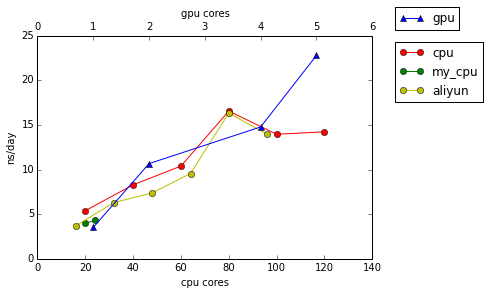

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.set_ylabel("ns/day")

cpu_cs = [20, 40, 60, 80, 100, 120]
cpu_per = [5.383, 8.282, 10.384, 16.545, 13.954, 14.223]
ax1.plot(cpu_cs, cpu_per, 'ro-', label='cpu')
my_cpu_cs = [20, 24]
my_cpu_per = [3.978, 4.294]
ax1.plot(my_cpu_cs, my_cpu_per, 'go-', label='my_cpu')
aliyun_cs = [16, 32, 48, 64, 80, 96]
aliyun_per = [3.697, 6.294, 7.383, 9.554, 16.324, 13.954]
ax1.plot(aliyun_cs, aliyun_per, 'yo-', label='aliyun')
ax1.set_xlabel(r"cpu cores")
ax1.axis([0, 140, 0, 25])
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2)

gpu_cs = [1, 2, 4, 5]
gpu_per = [3.514, 10.663, 14.770, 22.775]
ax2.plot(gpu_cs, gpu_per, 'b^-', label='gpu')
ax2.axis([0, 6, 0, 25])
ax2.set_xlabel(r"gpu cores")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=3)